# Script 5: Doppler effect

This script can apply a Doppler shift to the overall spectrum. It reads the spectra using the library WCS, different from the other script and it can give problems with some fits files, so I suggest to implant the pyasl library if necessary.


In [1]:
from PyAstronomy import pyasl
from astropy.io import fits
from astropy.wcs import WCS
from scipy.constants import c
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline


Reading spectra module using WCS library. Spectrum to analize MUST be located in the same script folder .

In [2]:
def read_spec(filename):
  
    sp = fits.open(filename)
    sp.info()
    header = sp[0].header
    
    tf = sp[0].data
    tf = tf.flatten()    
    
    wcs = WCS(header)
    index = np.arange(header['NAXIS1'])

    wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
    wavelength = wavelength.flatten()
    flux = sp[0].data
    sp.close()

    #date_obs = header['Date-OBS']
    date_obs = header['DATE']

    return header, wavelength, flux, date_obs, tf

Module to calculate Doppler shift. The units of c are m / s. The NumPy interp function is used to interpolate the spectrum shifted by Doppler effect. Remember that spectrum [0] is the header, spectrum [1] is the wavelength, spectrum [2] is the flow, and spectrum [3] is the date of the original file. The function returns the new interpolated flux, while new wavelength is not used.

In [3]:
def doppler_shift(spectrum, speed):
   
    doppler_factor = np.sqrt((1 + speed/c)/(1 - speed/c))
    print ("Doppler factor:" + str(doppler_factor))
    new_wavelength = spectrum[1] * doppler_factor
    new_flux = np.interp(new_wavelength, spectrum[1], spectrum[2])
    print(spectrum[3])
    return new_flux

Function used to save spectra. Some fits headers are modified.


In [4]:
def save_spec(filename, header, wavelength, flux, date_obs):
    
    header['CRVAL1'] = wavelength[0]
    header['DATE'] = date_obs
    hdu = fits.PrimaryHDU(flux, header)
    hdu.writeto(filename, overwrite=True)  
   

Function to plot spectra. We can change the size modifying the 'figsize' value.

In [5]:
def plotSpectrum(wavelength, flux):

    plt.plot(wavelength, flux)
    plt.xlabel('wavelength (A)')
    plt.ylabel('flux')
    plt.show()

### Core script.

Main variables and call to all the functions. When entering Doppler shifts, remember that a positive value means a red shift. So the sign is changed to the primitive variable "speed" and multiplied by 1000 (km / s -> m / s).


Enter spectrum to analyze:retail4000
Filename: retail4000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (20000,)   float32   
[4000.   4000.01 4000.02 ... 4199.97 4199.98 4199.99] [0.99309427 0.99309903 0.993104   ... 0.98853254 0.9884399  0.9883447 ]


Changed DATE-OBS from '01/01/00' to '1900-01-01''. [astropy.wcs.wcs]


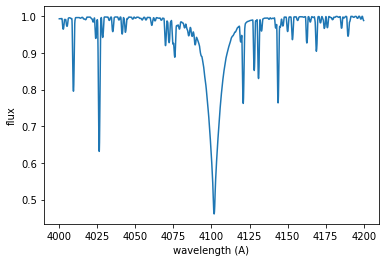

Doppler shift (km/s):400
Doppler factor:0.9986666325527908
2004-03-11T09:10:05
New shifted spectrum:
[4000.   4000.01 4000.02 ... 4199.97 4199.98 4199.99] [0.99309427 0.99309427 0.99309427 ... 0.99958063 0.99958439 0.9995875 ]


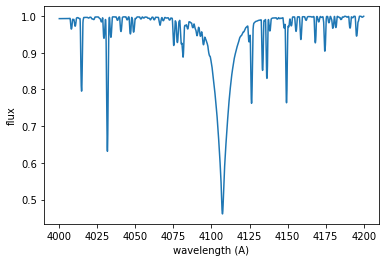

End


In [6]:
nameSpectrum = input ("Enter spectrum to analyze:")
nameSpectrum += ".fits"

#Reading spectrum
allData = read_spec(nameSpectrum)
header, wavelength, flux, date_obs, tf = allData
print(wavelength, flux)

#Plotting spectrum
plotSpectrum(wavelength, flux)

#Aplying Doppler shift
speed = -int(input("Doppler shift (km/s):"))*1000
new_flux = doppler_shift(allData, speed)    
print("New shifted spectrum:")
print(wavelength, new_flux)
plotSpectrum(wavelength, new_flux)

print("End")
